
##### 파라미터 조정
- 체스판 크기 변경 (기본값: n=8)
- 시각화 딜레이 조정
- 출력 형식 커스터마이징

##### 성능 고려사항
- 시간복잡도: O(N!)
- 8-Queens의 경우 92개의 해결책 존재
- n이 증가할수록 계산 시간 급격히 증가


현재 행: 2


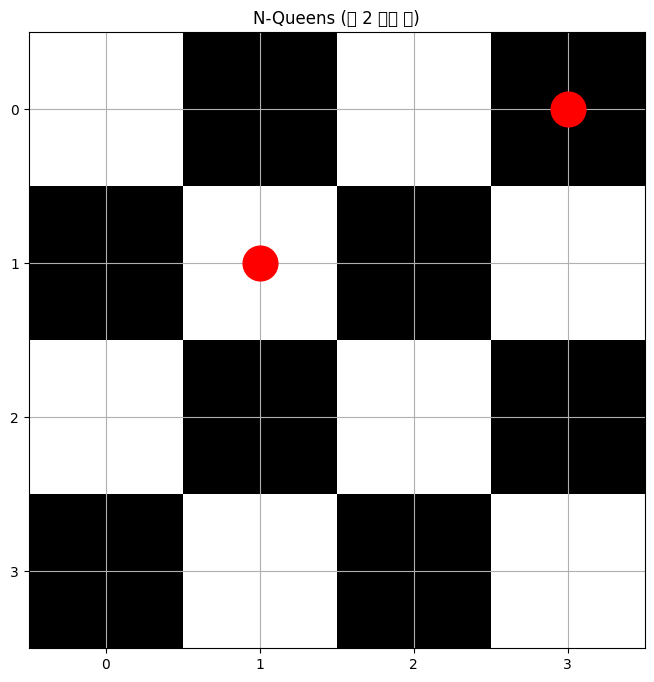

행 1, 열 1에서 백트래킹
행 0, 열 3에서 백트래킹

총 2개의 해결책을 찾았습니다.


/var/folders/zq/4m5p_74x32z5w1m0dxgvgm9h0000gn/T/ipykernel_86771/230719905.py:111: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zq/4m5p_74x32z5w1m0dxgvgm9h0000gn/T/ipykernel_86771/230719905.py:111: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zq/4m5p_74x32z5w1m0dxgvgm9h0000gn/T/ipykernel_86771/230719905.py:111: UserWarning: Glyph 52293 (\N{HANGUL SYLLABLE CAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


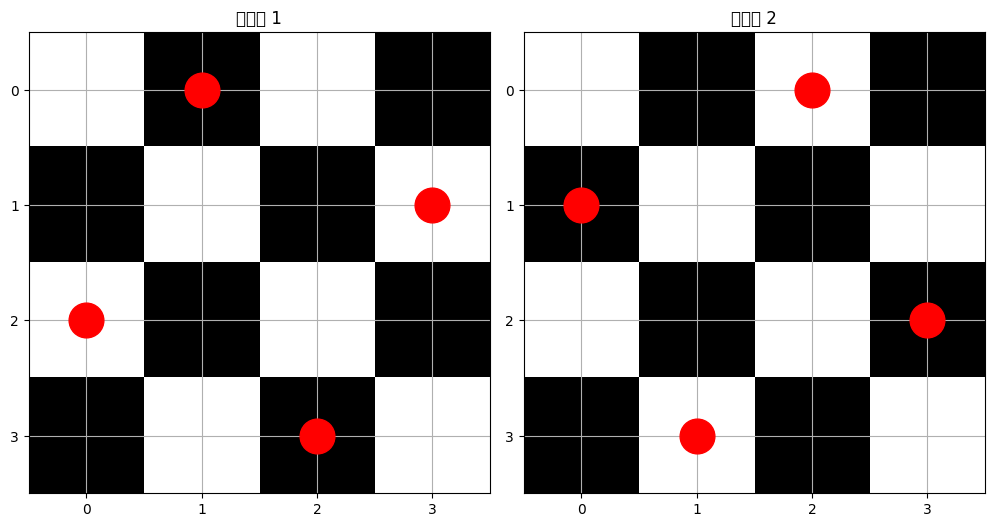

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time

def visualize_board(board, title="N-Queens 체스판", indent=""):
    """체스판을 시각화하는 함수"""
    n = len(board)
    
    # 체스판 생성
    board_visual = np.zeros((n, n))
    
    # 체스판 색상 설정
    for i in range(n):
        for j in range(n):
            if (i + j) % 2 == 0:
                board_visual[i, j] = 0.8  # 밝은 칸
            else:
                board_visual[i, j] = 0.3  # 어두운 칸
    
    plt.figure(figsize=(8, 8))
    plt.imshow(board_visual, cmap='gray')
    
    # 퀸 배치
    for row in range(n):
        if board[row] != -1:
            plt.plot(board[row], row, 'ro', markersize=25, label='Queen')
    
    plt.title(title)
    plt.grid(True)
    plt.xticks(range(n))
    plt.yticks(range(n))
    plt.show()

def solve_n_queens(n=8):
    def is_safe(board, row, col):
        # 같은 열에 퀸이 있는지 확인
        for i in range(row):
            if board[i] == col:
                return False
            
        # 왼쪽 대각선 확인
        for i, j in zip(range(row-1, -1, -1), range(col-1, -1, -1)):
            if board[i] == j:
                return False
            
        # 오른쪽 대각선 확인
        for i, j in zip(range(row-1, -1, -1), range(col+1, n)):
            if board[i] == j:
                return False
            
        return True

    def backtrack(board, row, depth=0):
        clear_output(wait=True)
        print(f"\n현재 행: {row}")
        visualize_board(board, f"N-Queens (행 {row} 진행 중)")
        time.sleep(0.5)  # 시각화를 위한 지연

        # 모든 행에 퀸을 배치했다면 해결책 추가
        if row == n:
            print("해결책 발견!")
            solutions.append(board[:])
            return
        
        # 현재 행의 각 열에 퀸을 놓아보기
        for col in range(n):
            if is_safe(board, row, col):
                print(f"행 {row}, 열 {col}에 퀸 배치 시도")
                board[row] = col  # 퀸 배치
                backtrack(board, row + 1, depth + 1)  # 다음 행으로 이동
                board[row] = -1  # 백트래킹
                print(f"행 {row}, 열 {col}에서 백트래킹")

    solutions = []
    initial_board = [-1] * n
    backtrack(initial_board, 0)
    return solutions

def display_all_solutions(solutions):
    """모든 해결책을 시각화하는 함수"""
    print(f"\n총 {len(solutions)}개의 해결책을 찾았습니다.")
    
    fig = plt.figure(figsize=(15, 5*((len(solutions)+2)//3)))
    for i, solution in enumerate(solutions, 1):
        plt.subplot(((len(solutions)+2)//3), 3, i)
        
        n = len(solution)
        board_visual = np.zeros((n, n))
        
        # 체스판 색상 설정
        for row in range(n):
            for col in range(n):
                if (row + col) % 2 == 0:
                    board_visual[row, col] = 0.8
                else:
                    board_visual[row, col] = 0.3
        
        plt.imshow(board_visual, cmap='gray')
        
        # 퀸 배치
        for row in range(n):
            if solution[row] != -1:
                plt.plot(solution[row], row, 'ro', markersize=25)
        
        plt.title(f'해결책 {i}')
        plt.grid(True)
        plt.xticks(range(n))
        plt.yticks(range(n))
    
    plt.tight_layout()
    plt.show()

# 실행
print("N-Queens 문제 해결 과정:")
n = 4  # 4x4 체스판으로 실행
solutions = solve_n_queens(n)
display_all_solutions(solutions)